In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
from mpl_toolkits import mplot3d
%matplotlib notebook

In [10]:
# load camera parameters
camera_parameters = np.genfromtxt("objectSR_par.txt")
cam_num = camera_parameters.shape[0]
camera_parameters = camera_parameters[~np.isnan(camera_parameters)]
camera_parameters = np.reshape(camera_parameters,(cam_num,21))

K = np.array((camera_parameters[0,0:9]))
R = np.array((camera_parameters[0,9:18]))
t = np.array((camera_parameters[0,18:21]))
for i in range(cam_num-1):
    K = np.hstack((K,np.array(camera_parameters[i+1,0:9])))
    R = np.hstack((R,np.array(camera_parameters[i+1,9:18])))
    t = np.hstack((t,np.array(camera_parameters[i+1,18:21])))
K = np.reshape(K,(cam_num,9))
R = np.reshape(R,(cam_num,9))
t = np.reshape(t,(cam_num,3))
np.transpose(K[0].reshape(3,3))
#np.hstack((np.transpose(R[0].reshape(3,3)),np.transpose(t[0].reshape(1,3))))

array([[1.122369e+03, 0.000000e+00, 1.095653e+02],
       [0.000000e+00, 1.110314e+03, 1.089183e+02],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]])

In [11]:
projectionmatrix = []
for i in range(cam_num):
    projectionmatrix.append((np.transpose(K[i].reshape(3,3))) @ (np.hstack
                                                                 ((np.transpose(R[i].reshape(3,3)),np.transpose(t[i].reshape(1,3))))))
    

In [12]:
def DLT(P1, P2, point1, point2):
 
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = np.array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    print(Vh[3,0:3]/Vh[3,3])
    return Vh[3,0:3]/Vh[3,3]

In [13]:
import cv2
import numpy as np
 

if __name__ == '__main__' :
    # Read image
    im1 = cv2.imread("sill3.png")
    # Select ROI
    r1 = cv2.selectROI(im1)
    im2 = cv2.imread('sill2.png')
    r2 = cv2.selectROI(im2)
    # Crop image
    imCrop = im1[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
    # Display cropped image
    cv2.imshow("Image", imCrop)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to tar

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to target thread (0x561f51fef8d0)

QObject::moveToThread: Current thread (0x561f51fef8d0) is not the object's thread (0x561f52d8da80).
Cannot move to tar

In [14]:
uvs1 = [[r1[0], r1[1]], [r1[0], r1[1]], [r1[0]+r1[2], r1[1]],
        [r1[0]+r1[2], r1[1]], [r1[0], r1[1]+r1[3]]]
 
uvs2 =  [[r2[0], r2[1]], [r2[0]+r2[2], r2[1]], [r2[0], r2[1]],
         [r2[0]+r2[2], r2[1]], [r2[0], r2[1]+r2[3]]]
 
uvs1 = np.array(uvs1)
uvs2 = np.array(uvs2)

p3ds = []
for uv1, uv2 in zip(uvs1, uvs2):
    _p3d = DLT(projectionmatrix[0], projectionmatrix[1], uv1, uv2)
    p3ds.append(_p3d)
p3ds = np.array(p3ds)
#store min max and difference of x y and z vol
xyz = [] 
for i in range (3):
    rang = int(max(p3ds[:,i]) - min(p3ds[:,i]))
    if rang > 80:
        rang = int(rang/2)
    xyz.append([min(p3ds[:,i]), max(p3ds[:,i]), rang])
#xyz[2][0] = xyz[2][0]-40
#xyz[2][1] = xyz[2][1]+40
#xyz[2][2] = xyz[2][2] + 40

Triangulated point: 
[229.02685034 139.81688329   5.82776303]
Triangulated point: 
[220.6514475   41.69839319  49.62396567]
Triangulated point: 
[231.6399569   42.91871645 -56.41286711]
Triangulated point: 
[222.28192029 -53.84846894  -4.75165661]
Triangulated point: 
[ 77.41702589 141.45441093  -8.40454307]


In [15]:
xyz

[[77.41702588642673, 231.63995690360423, 77],
 [-53.84846893879672, 141.4544109302698, 97],
 [-56.41286710511826, 49.62396567087573, 53]]

In [20]:
#img = Image.open('frame00000.pgm')
#img = np.array(img)
x = np.linspace(xyz[0][0],xyz[0][1],xyz[0][2])
y = np.linspace(xyz[1][0],xyz[1][1],xyz[1][2])
z = np.linspace(xyz[2][0],xyz[2][1],xyz[2][2])
Grid = np.ones((xyz[0][2],xyz[1][2],xyz[2][2]))
Grid = np.bool_((Grid))
img = []
for n in range(5):
    file = 'cam'+str(n)+'/silhouette/frame00000.pgm'
    temp = Image.open(file)
    temp = np.array(temp)
    img.append(temp)

    for i in range(xyz[0][2]):
        for j in range(xyz[1][2]):
            for k in range(xyz[2][2]):
                worldpoint = np.array(([[x[i]],[y[j]],[z[k]],[1]]))
                imagepoint1 = projectionmatrix[n] @ worldpoint
                imagepoint1 = imagepoint1/imagepoint1[2]
                if imagepoint1[0] > 319 or imagepoint1[1] > 299:
                    Grid[i][j][k] = False
                else:
                    if Grid[i][j][k] == True and img[n][int(imagepoint1[1])][int(imagepoint1[0])] != 255:
                        Grid[i][j][k] = False


In [30]:
Grid = (Grid >0)
print('Number of basis function')
Grid.sum()

Number of basis function


32911

In [32]:
#Grid = Grid == 5
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.voxels(Grid)

In [112]:
print(xyz)

[[73.28447095970323, 245.58579743885375, 86], [-79.03623994632552, 161.93321835686095, 120], [-72.70560436355505, 58.86405113313616, 65]]


In [133]:
u = 150
v = 100
Z = xyz[2][1]
print(Z)
a11 = R[0][2] * (u - K[0][6]) - R[0][0] * K[0][0]
a12 = R[0][5] * (u - K[0][6]) - R[0][3] * K[0][0]
a21 = R[0][2] * (v - K[0][7]) - R[0][1] * K[0][4]
a22 = R[0][5] * (v - K[0][7]) - R[0][4] * K[0][4]
b11 = t[0][0] * K[0][0] - t[0][2] * (u - K[0][6]) - Z * (R[0][8] * (u - K[0][6]) - R[0][6] * K[0][0])
b21 = t[0][1] * K[0][4] - t[0][2] * (v - K[0][7]) - Z * (R[0][8] * (v - K[0][7]) - R[0][7] * K[0][4])
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
X =  np.linalg.solve(A, b)
#if (X[0][0] > xyz[0][0] or X[0][0] < xyz[0][1]) and  (X[1][0] > xyz[1][0] or X[1][0] < xyz[1][1])
print(X)

60.61492257766296
[[177.808726  ]
 [-61.10567507]]


In [289]:
x = np.linspace(xyz[0][0],xyz[0][1],xyz[0][2])
y = np.linspace(xyz[1][0],xyz[1][1],xyz[1][2])
z = np.linspace(xyz[2][0],xyz[2][1],xyz[2][2])
Grid = np.zeros((xyz[0][2]+1,xyz[1][2]+1,xyz[2][2]+1))
print(Grid.shape)
print(Grid[86][120][65])

(87, 121, 66)
0.0


In [15]:
xyz

[[63.73641269046278, 251.25619804843933, 93],
 [-76.15696718757896, 155.93110546148475, 116],
 [-67.88985138933052, 58.47097469469187, 63]]

In [16]:


def xyplane(Z,R,K,t,u,v,n,xyz):
    xcoff1 = R[n][2] * (u - K[n][6]) - R[n][0] * K[n][0]
    ycoff1 = R[n][5] * (u - K[n][6]) - R[n][3] * K[n][0]
    zcoff1 = R[n][8] * (u - K[n][6]) - R[n][6] * K[n][0]
    xcoff2 = R[n][2] * (v - K[n][7]) - R[n][1] * K[n][4]
    ycoff2 = R[n][5] * (v - K[n][7]) - R[n][4] * K[n][4]
    zcoff2 = R[n][8] * (v - K[n][7]) - R[n][7] * K[n][4]

    d11 = t[n][0] * K[n][0] - t[n][2] * (u - K[n][6])
    d21 = t[n][1] * K[n][4] - t[n][2] * (v - K[n][7]) 

    b11 = d11 - Z * zcoff1
    b21 = d21 - Z * zcoff2
    a11 = xcoff1
    a12 = ycoff1
    a21 = xcoff2
    a22 = ycoff2
    #print(xcoff1,ycoff1,zcoff1,xcoff2,ycoff2,zcoff2)
    
    
    A = np.array(([[a11, a12], [a21, a22]]))
    b = np.array(([[b11],[b21]]))
    X =  np.linalg.solve(A, b)
    #print(A)
    #print(X)
    worldpoint = np.array(([[X[0][0]],[X[1][0]],[Z]]))
    Flag = False
    if (X[0][0] > xyz[0][0] and X[0][0] < xyz[0][1]) and  (X[1][0] > xyz[1][0] and X[1][0] < xyz[1][1]):
        pass
    else:
        Flag = True
    return Flag, worldpoint

In [17]:
A = np.array(([[-12],[10],[15]]))
B = np.array(([11],[12],[13]))
C = A-B
stepx = C[0][0] / abs(C[0][0]) * ((xyz[0][1] - xyz[0][0]) / (xyz[0][2]))
stepy = (C[1][0] / abs(C[1][0])) * 2
stepz = C[2][0] / abs(C[2][0])
print(int(stepx),stepy,stepz)

-2 -2.0 1.0


In [18]:

def yzplane(X,R,K,t,u,v,n,xyz):
    xcoff1 = R[n][2] * (u - K[n][6]) - R[n][0] * K[n][0]
    ycoff1 = R[n][5] * (u - K[n][6]) - R[n][3] * K[n][0]
    zcoff1 = R[n][8] * (u - K[n][6]) - R[n][6] * K[n][0]
    xcoff2 = R[n][2] * (v - K[n][7]) - R[n][1] * K[n][4]
    ycoff2 = R[n][5] * (v - K[n][7]) - R[n][4] * K[n][4]
    zcoff2 = R[n][8] * (v - K[n][7]) - R[n][7] * K[n][4]

    d11 = t[n][0] * K[n][0] - t[n][2] * (u - K[n][6])
    d21 = t[n][1] * K[n][4] - t[n][2] * (v - K[n][7]) 

    b11 = d11 - X * xcoff1
    b21 = d21 - X * xcoff2
    a11 = zcoff1
    a12 = ycoff1
    a21 = zcoff2
    a22 = ycoff2
    A = np.array(([[a11, a12], [a21, a22]]))
    b = np.array(([[b11],[b21]]))
    Z =  np.linalg.solve(A, b)
    #print(A)
    #print(Z)
    worldpoint = np.array(([[X],[Z[1][0]],[Z[0][0]]]))
    Flag = False
    if (Z[0][0] > xyz[2][0] and Z[0][0] < xyz[2][1]) and  (Z[1][0] > xyz[1][0] and Z[1][0] < xyz[1][1]):
        pass
    else:
        Flag = True
    return Flag, worldpoint

In [19]:

def xzplane(Y,R,K,t,u,v,n,xyz):
    xcoff1 = R[n][2] * (u - K[n][6]) - R[n][0] * K[n][0]
    ycoff1 = R[n][5] * (u - K[n][6]) - R[n][3] * K[n][0]
    zcoff1 = R[n][8] * (u - K[n][6]) - R[n][6] * K[n][0]
    xcoff2 = R[n][2] * (v - K[n][7]) - R[n][1] * K[n][4]
    ycoff2 = R[n][5] * (v - K[n][7]) - R[n][4] * K[n][4]
    zcoff2 = R[n][8] * (v - K[n][7]) - R[n][7] * K[n][4]

    d11 = t[n][0] * K[n][0] - t[n][2] * (u - K[n][6])
    d21 = t[n][1] * K[n][4] - t[n][2] * (v - K[n][7]) 

    b11 = d11 - Y * ycoff1
    b21 = d21 - Y * ycoff2
    a11 = xcoff1
    a12 = zcoff1
    a21 = xcoff2
    a22 = zcoff2
    A = np.array(([[a11, a12], [a21, a22]]))
    b = np.array(([[b11],[b21]]))
    Z =  np.linalg.solve(A, b)
    #print(Z)
    worldpoint = np.array(([[Z[0][0]],[Y],[Z[1][0]]]))
    #print(Z[1][0],xyz[2][0],Z[1][0],xyz[2][1])
    #print(worldpoint)
    Flag = False
    if (Z[0][0] > xyz[0][0] and Z[0][0] < xyz[0][1]) and  (Z[1][0] > xyz[2][0] and Z[1][0] < xyz[2][1]):
        pass
    else:
        Flag = True
    return Flag, worldpoint

In [20]:
def get_voxel(worldpoint, xyz):
    voxel_x = ((worldpoint[0][0] - xyz[0][0]) / (xyz[0][1]-xyz[0][0])) * xyz[0][2]
    voxel_y = ((worldpoint[1][0] - xyz[1][0]) / (xyz[1][1]-xyz[1][0])) * xyz[1][2]
    voxel_z = ((worldpoint[2][0] - xyz[2][0]) / (xyz[2][1]-xyz[2][0])) * xyz[2][2]
    return int(voxel_x), int(voxel_y), int(voxel_z)

In [28]:
def raytracing(R,K,t,u,v,n,xyz,worldpoint1,worldpoint2,Grid):
    #find step size 
    C = worldpoint2-worldpoint1
    stepx = int(C[0][0] / abs(C[0][0]) * ((xyz[0][1] - xyz[0][0]) / (xyz[0][2])))
    stepy = int(C[1][0] / abs(C[1][0]) * ((xyz[1][1] - xyz[1][0]) / (xyz[1][2])))
    stepz = int(C[2][0] / abs(C[2][0]) * ((xyz[2][1] - xyz[2][0]) / (xyz[2][2])))
    #count first voxel
    #print(worldpoint1)
    
    x, y, z = get_voxel(worldpoint1, xyz)
    #print(x,y,z)
    if Grid[x][y][z] == n:
        Grid[x][y][z] = Grid[x][y][z] + 1
    #Grid[x][y][z] = n+1
    
    #start raytracing algorithm
#     while (worldpoint1[0][0] <= xyz[0][1]) and (worldpoint1[1][0] <= xyz[1][1]) and (
#         worldpoint1[2][0] <= xyz[2][1]) and (worldpoint1[0][0] >= xyz[0][0]) and (
#         worldpoint1[1][0] >= xyz[1][0]) and (worldpoint1[2][0] >= xyz[2][0]) :
    
#         X = ((((x + stepx) - 0)/xyz[0][2]) * (xyz[0][1] - xyz[0][0])) + xyz[0][0]
#         #X = worldpoint1[0][0]+stepx
#         flag, worldpoint_x = yzplane(X,R,K,t,u,v,n,xyz)
#         #Y = worldpoint1[1][0]+stepy
#         Y = ((((y + stepy) - 0)/xyz[1][2]) * (xyz[1][1] - xyz[1][0])) + xyz[1][0]
#         flag, worldpoint_y = xzplane(Y,R,K,t,u,v,n,xyz)
#         #Z = worldpoint1[2][0]+stepz
#         Z = ((((z + stepz) - 0)/xyz[2][2]) * (xyz[2][1] - xyz[2][0])) + xyz[2][0]
#         flag, worldpoint_z = xyplane(Z,R,K,t,u,v,n,xyz)
#         if np.linalg.norm(worldpoint_x - worldpoint1) < np.linalg.norm(worldpoint_y - worldpoint1):
#             if np.linalg.norm(worldpoint_z - worldpoint1) < np.linalg.norm(worldpoint_x - worldpoint1):
#                 worldpoint1 = worldpoint_z
#             else:
#                 worldpoint1 = worldpoint_x
#         else:
#             if np.linalg.norm(worldpoint_z - worldpoint1) < np.linalg.norm(worldpoint_y - worldpoint1):
#                 worldpoint1 = worldpoint_z
#             else:
#                 worldpoint1 = worldpoint_y
#         x, y, z = get_voxel(worldpoint1, xyz)
#         if Grid[x][y][z] == n:
#             Grid[x][y][z] = Grid[x][y][z] + 1
#         #Grid[x][y][z] = n+1
    
    return Grid
    
    

In [29]:
#x = np.linspace(xyz[0][0],xyz[0][1],xyz[0][2])
#y = np.linspace(xyz[1][0],xyz[1][1],xyz[1][2])
#z = np.linspace(xyz[2][0],xyz[2][1],xyz[2][2])
Grid = np.zeros((xyz[0][2]+4,xyz[1][2]+4,xyz[2][2]+4))
img = []
for n in range(5):
    file = 'cam'+str(n)+'/silhouette/frame00000.pgm'
    temp = Image.open(file)
    temp = np.array(temp)
    img.append(temp)
    if n == 0 :
        for u in range(img[n].shape[1]):
            for v in range(img[n].shape[0]):
                if img[n][v][u] == 255:
                    Z = xyz[2][0]
                    Flag, worldpoint2 = xyplane(Z+10,R,K,t,u,v,n,xyz)
                    Flag, worldpoint1 = xyplane(Z,R,K,t,u,v,n,xyz)
                    #print(worldpoint1,Flag)
                    if Flag:
                        #print(worldpoint1)
                        X = xyz[0][0]
                        Flag, worldpoint2 = yzplane(X+10,R,K,t,u,v,n,xyz)
                        Flag, worldpoint1 = yzplane(X,R,K,t,u,v,n,xyz)

                        if Flag:
                            Y = xyz[1][0]
                            Flag, worldpoint2 = xzplane(Y+10,R,K,t,u,v,n,xyz)
                            Flag, worldpoint1 = xzplane(Y,R,K,t,u,v,n,xyz)
                            
                            if Flag:
                                Z = xyz[2][1]
                                Flag, worldpoint2 = xyplane(Z-10,R,K,t,u,v,n,xyz)
                                Flag, worldpoint1 = xyplane(Z,R,K,t,u,v,n,xyz)
                                #print(worldpoint1)

                                if Flag:
                                    X = xyz[0][1]
                                    Flag, worldpoint2 = yzplane(X-10,R,K,t,u,v,n,xyz)
                                    Flag, worldpoint1 = yzplane(X,R,K,t,u,v,n,xyz)
                                    #print(worldpoint1,Flag)
                                    if Flag:
                                        Y = xyz[1][1]
                                        Flag, worldpoint2 = xzplane(Y-10,R,K,t,u,v,n,xyz)
                                        Flag, worldpoint1 = xzplane(Y,R,K,t,u,v,n,xyz)
                                        #print(worldpoint1)
                                        
                                        

                    if not Flag:
                        Grid = raytracing(R,K,t,u,v,n,xyz,worldpoint1,worldpoint2,Grid)
        

In [17]:
Grid[8][20][0]

0.0

In [30]:
Grid = (Grid ==1)
print('Number of basis function')
Grid.sum()

Number of basis function


1557

In [23]:
xyz

[[68.99948247783807, 245.58341745254586, 88],
 [-91.14560437279786, 180.6347296686002, 135],
 [-76.76797711194642, 71.06558019804648, 73]]

<IPython.core.display.Javascript object>


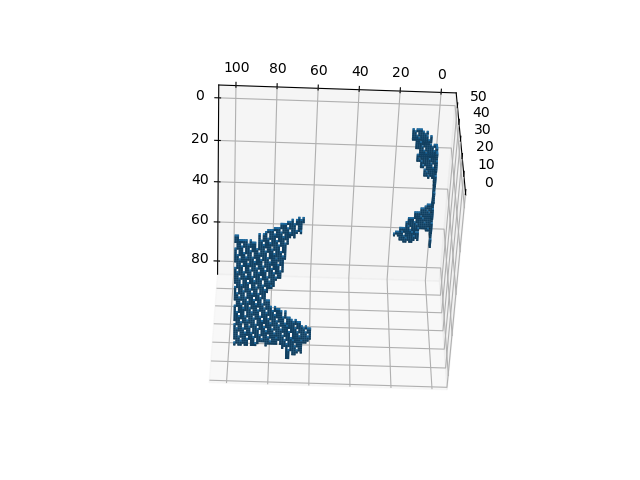

{(8, 8, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d65a080>,
 (8, 9, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f0460>,
 (8, 10, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f0850>,
 (8, 12, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f0c40>,
 (8, 65, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f1030>,
 (8, 67, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f1420>,
 (9, 5, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f1810>,
 (9, 7, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f1c00>,
 (9, 8, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f1ff0>,
 (9, 9, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f23e0>,
 (9, 11, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f27d0>,
 (9, 12, 53): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7faf3d6f2bc0>,
 (9, 65, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at

In [31]:
#Grid = Grid == 5
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.voxels(Grid)

In [102]:
u = 170
v = 100
Z = xyz[2][0]
print(Z)
X = xyz[0][1]
X = 173.28870886
Y = xyz[1][1]
flag, worldpoint = xyplane(Z,R,K,t,u,v,0,xyz)
X = worldpoint[0][0]
Y = worldpoint[1][0]
print(worldpoint)
flag, worldpoint = yzplane(X,R,K,t,u,v,0,xyz)
print(worldpoint)
flag, worldpoint = xzplane(Y,R,K,t,u,v,0,xyz)
print(worldpoint)

-58.910127795971874
[[193.48427061]
 [126.7484477 ]
 [-58.9101278 ]]
[[193.48427061]
 [126.7484477 ]
 [-58.9101278 ]]
[[193.48427061]
 [126.7484477 ]
 [-58.9101278 ]]


In [134]:
u = 140
v = 140
X = xyz[0][0]
X = -61.1
print(X)
a11 = R[0][8] * (u - K[0][6]) - R[0][6] * K[0][0]
a12 = R[0][5] * (u - K[0][6]) - R[0][3] * K[0][0]
a21 = R[0][8] * (v - K[0][7]) - R[0][7] * K[0][4]
a22 = R[0][5] * (v - K[0][7]) - R[0][4] * K[0][4]
b11 = t[0][0] * K[0][0] - t[0][2] * (u - K[0][6]) - X * (R[0][2] * (u - K[0][6]) - R[0][0] * K[0][0])
b21 = t[0][1] * K[0][4] - t[0][2] * (v - K[0][7]) - X * (R[0][2] * (v - K[0][7]) - R[0][1] * K[0][4])
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
Z =  np.linalg.solve(A, b)
print(Z)

-61.1
[[ 3300.04861753]
 [-6850.45930882]]


In [125]:
u = 140
v = 140
Y = xyz[2][1]
print(Y)
a11 = R[0][2] * (u - K[0][6]) - R[0][0] * K[0][0]
a12 = R[0][8] * (u - K[0][6]) - R[0][6] * K[0][0]
a21 = R[0][2] * (v - K[0][7]) - R[0][1] * K[0][4]
a21 = R[0][8] * (v - K[0][7]) - R[0][7] * K[0][4]
b11 = t[0][0] * K[0][0] - t[0][2] * (u - K[0][6]) - Y * (R[0][5] * (u - K[0][6]) - R[0][3] * K[0][0])
b21 = t[0][1] * K[0][4] - t[0][2] * (v - K[0][7]) - Y * (R[0][5] * (v - K[0][7]) - R[0][4] * K[0][4])
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
Z =  np.linalg.solve(A, b)
print(Z)

60.61492257766296
[[1742.48318977]
 [ 141.56736003]]


In [243]:
print(xyz)

[[-78.02431157889961, 347.98504255799025, 47], [-396.2488268633369, 460.61070742145387, 95], [-238.1307925802646, 234.53938654816378, 52]]


In [114]:
#img = projectionmatrix[0] @ np.array(([[1940.4],[xyz[1][0]],[198.2],[1]]))
#img = projectionmatrix[0] @ np.array(([[127],[201],[xyz[2][0]],[1]]))
img = projectionmatrix[0] @ np.array(([[65],[-76],[-71],[1]]))

In [115]:
img = img/img[2]
img

array([[253.07340801],
       [208.74275821],
       [  1.        ]])

In [74]:
t[0][1]

173.6073

In [29]:
R[0]

array([ 0.07442869, -0.9958888 ,  0.05163251, -0.4056304 ,  0.01706543,
        0.9138779 , -0.9110019 , -0.08896245, -0.4026926 ])

In [30]:
K[0]

array([1.122369e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.110314e+03, 0.000000e+00, 1.095653e+02, 1.089183e+02,
       1.000000e+00])

In [84]:
b11

-187365.2073346682

In [83]:
K[0][6] + t[0][0] * K[0][0] - t[0][2] * u - X * (R[0][2] * u - R[0][0] * K[0][0])

-187365.2073346682

In [87]:
-73.2*X

-4216.532110836174

[0 0 0]


<IPython.core.display.Javascript object>


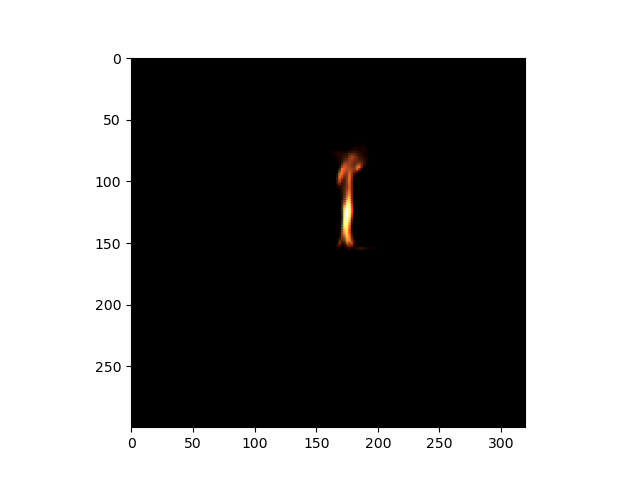

In [119]:
img = Image.open('sill4.png')
#img.show()
img = np.array(img)
print(img[150][150])
plt.imshow(img)

In [135]:
u = 150
v = 100
Z = xyz[2][1]
print(Z)
xcoff1 = R[0][2] * (u - K[0][6]) - R[0][0] * K[0][0]
ycoff1 = R[0][5] * (u - K[0][6]) - R[0][3] * K[0][0]
zcoff1 = R[0][8] * (u - K[0][6]) - R[0][6] * K[0][0]
xcoff2 = R[0][2] * (v - K[0][7]) - R[0][1] * K[0][4]
ycoff2 = R[0][5] * (v - K[0][7]) - R[0][4] * K[0][4]
zcoff2 = R[0][8] * (v - K[0][7]) - R[0][7] * K[0][4]

d11 = t[0][0] * K[0][0] - t[0][2] * (u - K[0][6])
d21 = t[0][1] * K[0][4] - t[0][2] * (v - K[0][7]) 

b11 = d11 - Z * zcoff1
b21 = d21 - Z * zcoff2
a11 = xcoff1
a12 = ycoff1
a21 = xcoff2
a22 = ycoff2
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
X =  np.linalg.solve(A, b)
#if (X[0][0] > xyz[0][0] or X[0][0] < xyz[0][1]) and  (X[1][0] > xyz[1][0] or X[1][0] < xyz[1][1])
print(X)

60.61492257766296
[[177.808726  ]
 [-61.10567507]]


In [161]:
u = 150
v = 100
Z = xyz[2][1]
X = 177.8
Y = -61
print(Z)
xcoff1 = R[0][2] * (u - K[0][6]) - R[0][0] * K[0][0]
ycoff1 = R[0][5] * (u - K[0][6]) - R[0][3] * K[0][0]
zcoff1 = R[0][8] * (u - K[0][6]) - R[0][6] * K[0][0]
xcoff2 = R[0][2] * (v - K[0][7]) - R[0][1] * K[0][4]
ycoff2 = R[0][5] * (v - K[0][7]) - R[0][4] * K[0][4]
zcoff2 = R[0][8] * (v - K[0][7]) - R[0][7] * K[0][4]

d11 = t[0][0] * K[0][0] - t[0][2] * (u - K[0][6])
d21 = t[0][1] * K[0][4] - t[0][2] * (v - K[0][7]) 

b11 = d11 - X * xcoff1
b21 = d21 - X * xcoff2
a11 = zcoff1
a12 = ycoff1
a21 = zcoff2
a22 = ycoff2
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
X =  np.linalg.solve(A, b)
#if (X[0][0] > xyz[0][0] or X[0][0] < xyz[0][1]) and  (X[1][0] > xyz[1][0] or X[1][0] < xyz[1][1])
print(X)

60.61492257766296
[[ 60.67580939]
 [-61.23158414]]


In [158]:
X = -177.8
Z = 60.61
Y = -61
d11 = 16430.89
d21 = 204390.85
b11 = d11 - Y * ycoff1
b21 = d21 - Y * ycoff2
a11 = xcoff1
a12 = zcoff1
a21 = xcoff2
a22 = zcoff2
A = np.array(([[a11, a12], [a21, a22]]))
b = np.array(([[b11],[b21]]))
X =  np.linalg.solve(A, b)
#if (X[0][0] > xyz[0][0] or X[0][0] < xyz[0][1]) and  (X[1][0] > xyz[1][0] or X[1][0] < xyz[1][1])
print(X)

[[177.8160482 ]
 [ 60.56381242]]


In [201]:
A = np.array(([[4],[5],[6]]))
print(A)
B = np.array(([[7],[8],[9]]))
C = np.linalg.norm(A-B)
print(C)

[[4]
 [5]
 [6]]
5.196152422706632
